Project Name: Heart Disease Prediction
Team Mates: Jahnavi & Jithendra
Date: 11.08.2024

In [1]:
# Added necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

In [4]:
# Loaded the data set
data = pd.read_csv(r"C:\Users\RAGHU JAMMULA\OneDrive - Saint Peters University\Desktop\Jahnavi - 630 Dongle Project\heart_disease.csv")

In [5]:
#To see the first five 5 rows head is used.
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [6]:
# Info is used to see the data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
# To get statistical analysis describe is used.
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Transforming for Outliers

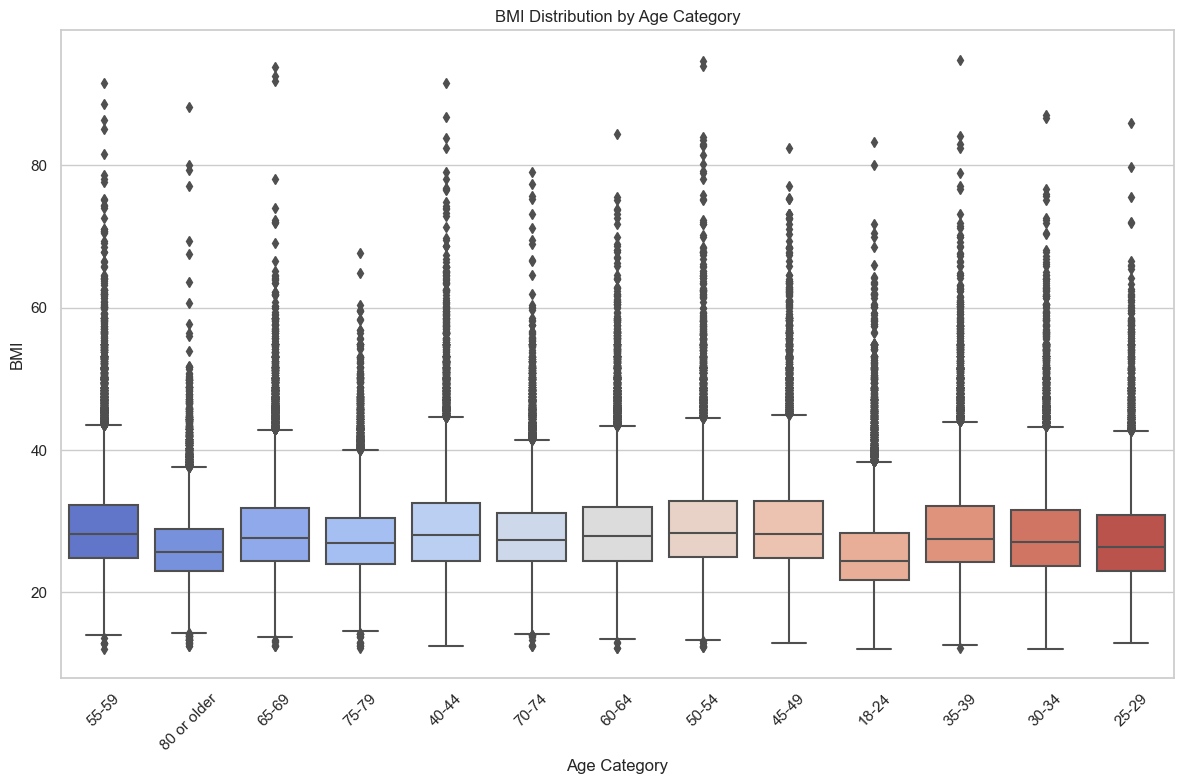

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Created a boxplot to show the distribution of BMI across different age categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=data, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('BMI Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.tight_layout()

In [9]:
import numpy as np

# Identified the numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns

# Calculated the z-scores for each numerical column
z_scores = np.abs((data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std())

# Setting a threshold for z-scores (e.g., 3)
threshold = 3.5

# Creating a mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Removing rows with outliers
data = data[~outlier_mask]

# Printing the shape of the modified Data set
print("Data set shape after removing outliers:", data.shape)

Data set shape after removing outliers: (317562, 18)


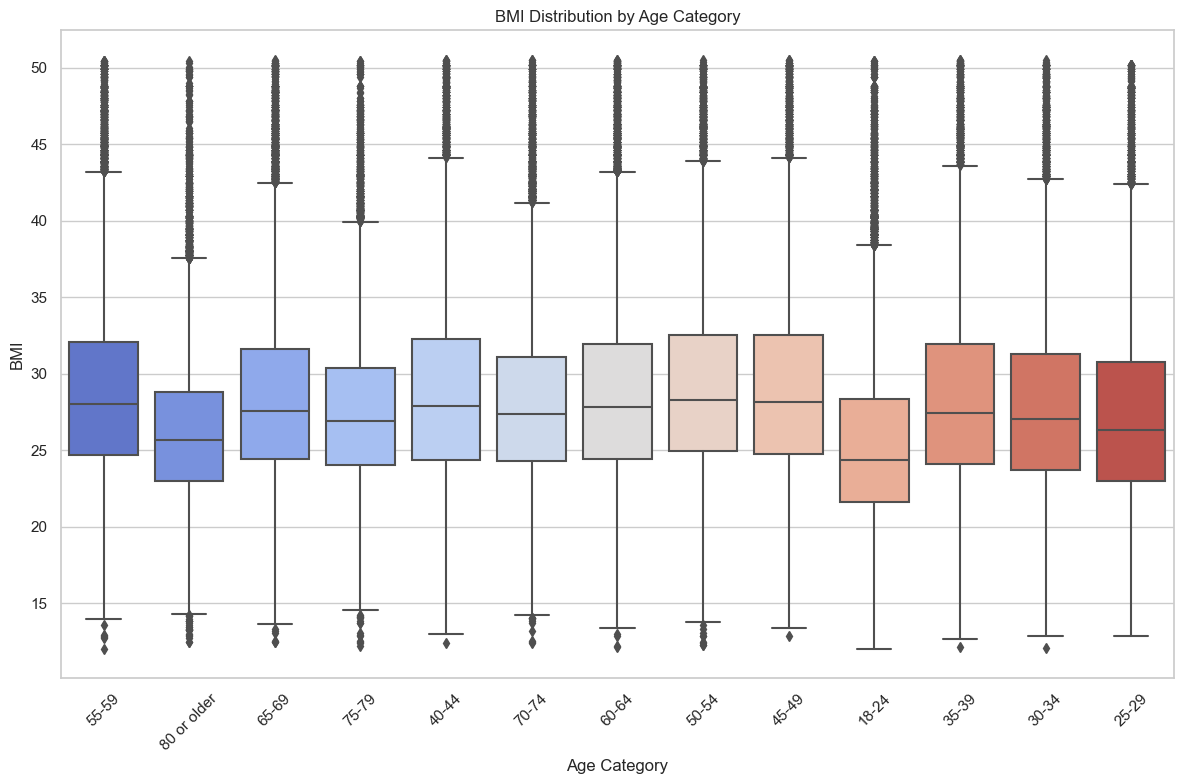

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Created a boxplot to show the distribution of BMI across different age categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=data, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('BMI Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.tight_layout()

# Showing Correlation

In [11]:
# Correlation among each value of data
corrmat = data.corr()
corrmat

C:\Users\RAGHU JAMMULA\AppData\Local\Temp\ipykernel_4900\1163992667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.094498,0.052407,-0.050247
PhysicalHealth,0.094498,1.000000,0.285252,-0.060675
MentalHealth,0.052407,0.285252,1.000000,-0.119825
SleepTime,-0.050247,-0.060675,-0.119825,1.000000


C:\Users\RAGHU JAMMULA\AppData\Local\Temp\ipykernel_4900\175047451.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


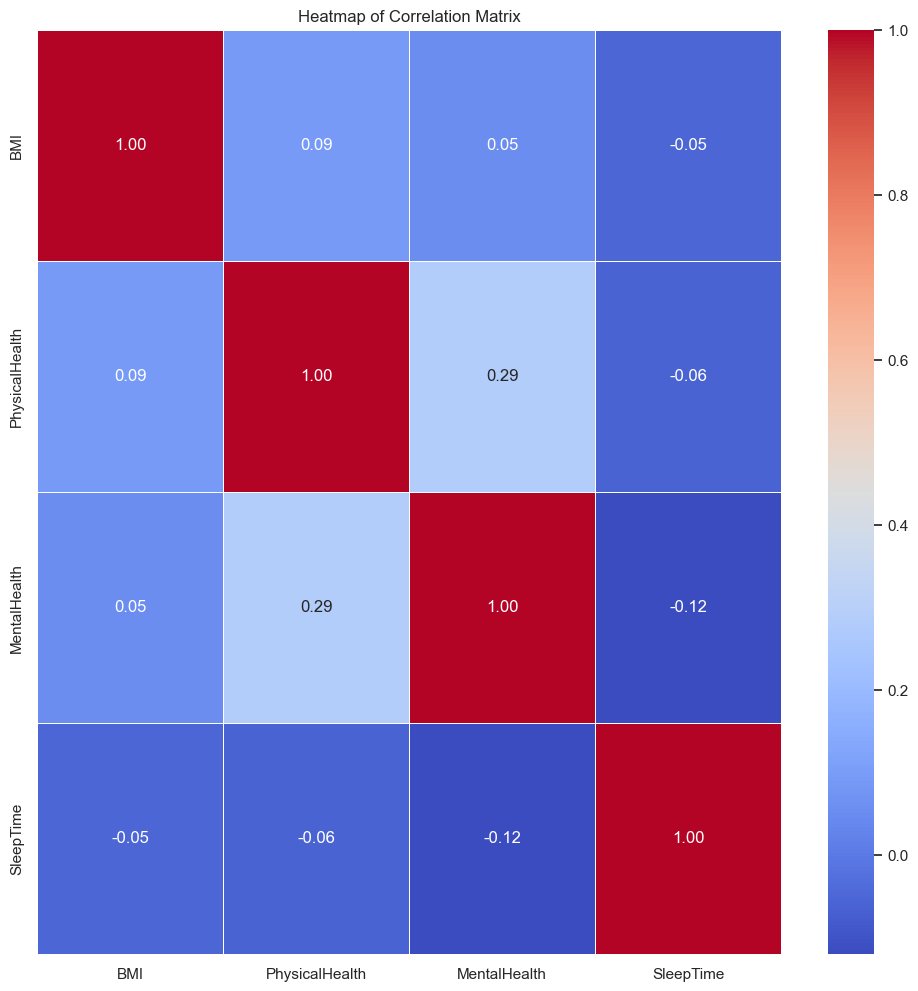

In [12]:
# heatmap for correlation
# First, compute the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 12))
# Now, plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5,fmt=".2f")

plt.title('Heatmap of Correlation Matrix')
plt.show()

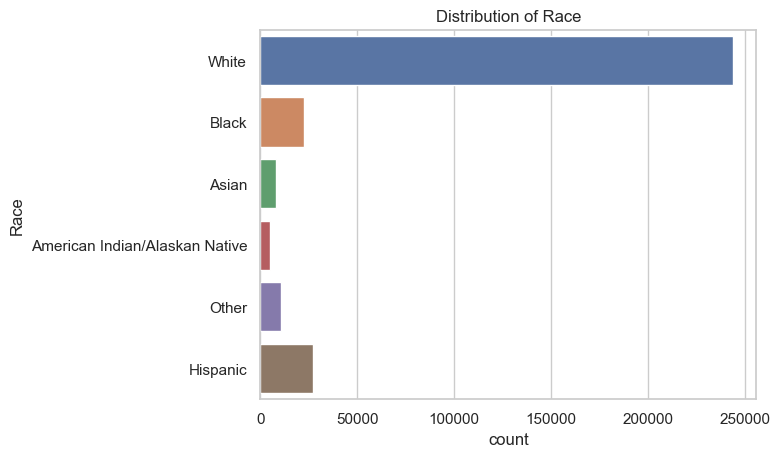

In [13]:
# Checking data for various ethnicities
sns.countplot(y='Race', data=data)
plt.title('Distribution of Race')
plt.show()

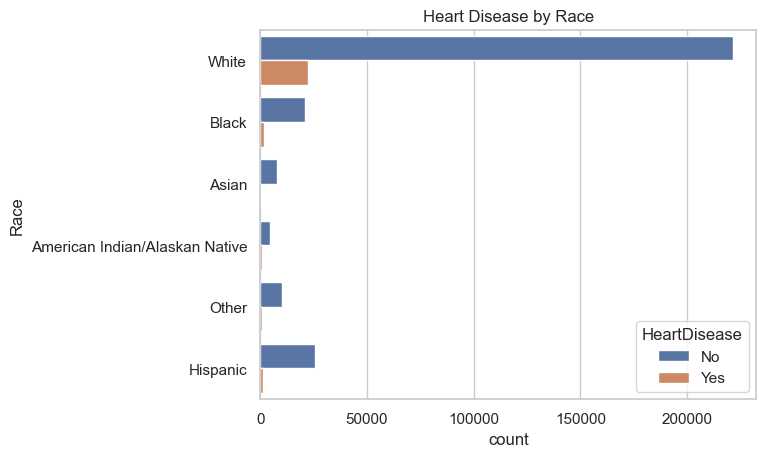

In [14]:
# Heart Diseases among ethnicities
sns.countplot(y='Race', hue='HeartDisease', data=data)
plt.title('Heart Disease by Race')
plt.show()

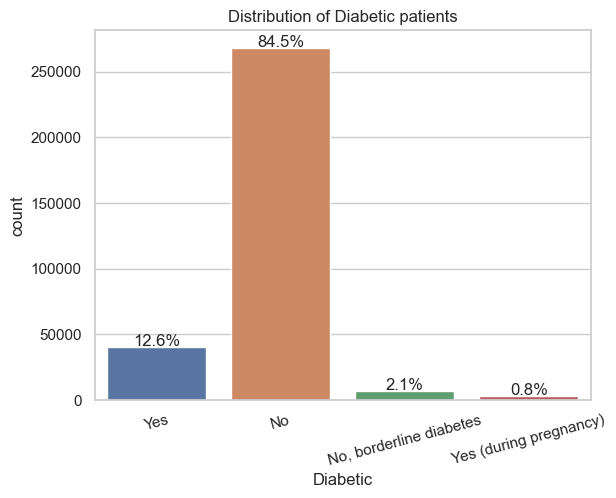

In [15]:
# Countplot for Diabetic 
sns.countplot(x='Diabetic', data=data)
plt.title('Distribution of Diabetic patients')
plt.xticks(rotation=15)  # Tilt x-axis ticks

# Add percentage labels
total = len(data['Diabetic'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1000  # You can adjust the vertical position of the text
    plt.gca().annotate(percentage, (x, y), ha='center')

plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows of the transformed DataFrame
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [17]:
# Display unique values for the 'Diabetic' column after encoding
encoded_diabetic_unique_values = data['Diabetic'].unique()
encoded_diabetic_unique_values

array([2, 0, 1, 3])

In [18]:
# Display unique values for the 'GenHealth' column after encoding
encoded_genhealth_unique_values = data['GenHealth'].unique()
encoded_genhealth_unique_values

array([4, 1, 2, 3, 0])

<h3>logistic regression</h3>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate the target variable (y) and the features (X)
y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])

# Spliting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialized and fit the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
start_time = time.time()
logistic_regression_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Predicted on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
accuracy

0.9152400046185013

In [21]:
print("Training time:", training_time)

Training time: 10.280002355575562


In [22]:
conf_matrix

array([[86429,   697],
       [ 7378,   765]], dtype=int64)

In [23]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87126
           1       0.52      0.09      0.16      8143

    accuracy                           0.92     95269
   macro avg       0.72      0.54      0.56     95269
weighted avg       0.89      0.92      0.89     95269



array([[86429,   697],
       [ 7378,   765]], dtype=int64)

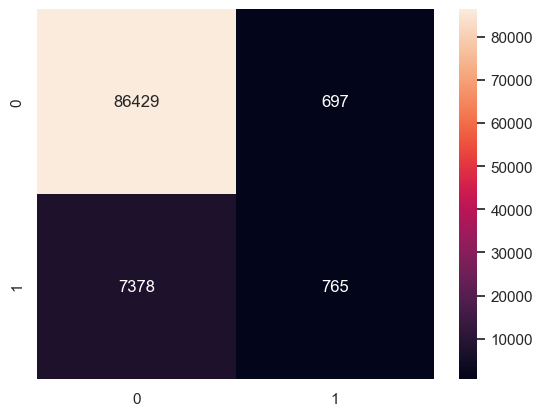

In [24]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")
matrix

<h2>random forest</h2>

In [25]:
# Separate the target variable (y) and the features (X)
y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'],axis=1)

In [26]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Create instance of Random Forest Classifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=10)
start_time = time.time()

In [28]:
clf.fit(X_train, y_train) # Fitting model
end_time = time.time()
training_time = end_time - start_time

In [29]:
clf.score(X_train, y_train) # Training Score

0.9146621800956395

In [30]:
clf.score(X_test, y_test) # Testing Score

0.9145262362363413

In [31]:
clf_predict = clf.predict(X_test)

In [32]:
clf_score = round(accuracy_score(clf_predict,y_test)*100,2)

In [33]:
print("Accuracy is:",round(accuracy_score(y_test, clf_predict),4)*100,"%")

Accuracy is: 91.45 %


In [34]:
print("Training time:", training_time)

Training time: 10.178858518600464


In [35]:
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87126
           1       0.00      0.00      0.00      8143

    accuracy                           0.91     95269
   macro avg       0.46      0.50      0.48     95269
weighted avg       0.84      0.91      0.87     95269



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
